# Basic Operations on Images

**Prashant Brahmbhatt**  

www.github.com/hashbanger  
  
www.linkedin.com/in/prashantbrahmbhatt

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Accessing and modifying Pixel Values

In [24]:
img = cv.imread('ronaldo.jpg', 1)

In [25]:
cv.imshow('imd',img)
cv.waitKey(0)
cv.destroyAllWindows()

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned. 

In [26]:
px = img[100, 100]
print(px)

[230 226 225]


Accessing only blue pixel

In [27]:
blue = img[100, 100, 0] #Similarly 1 for green, 2, for red
print(blue)

230


We can modify the pixel values as 

In [28]:
img[100, 100] = [255, 255, 255]
print(img[100, 100])

[255 255 255]


But it is not recommended to loop through each pixel to modify it

The above method is normally used for selecting a region of an array, say the first 5 rows and last 3 columns. For individual pixel access, the Numpy array methods, **array.item()** and **array.itemset()** are considered better, however they always return a scalar. To access all B,G,R values, call **array.item()** separately for all.

In [29]:
#accessing the red value
print(img.item(10, 10, 2))
#modifying the red value
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

55


100

## Accessing Image Properties

In [31]:
#Shape of the image
print(img.shape)

#Getting the type of image 
print(img.dtype)

(717, 448, 3)
uint8


**img.dtype** is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.

### Image ROI 

ROI means Region Of Interest

Sometimes, we require to play with certain region of images. For eye detection in images, first face detection is done all over the image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).

In [87]:
img = cv.imread('ronaldo.jpg', 1)

In [88]:
ball = img[590:660, 340:420]
img[590:660, 100:180] = ball
cv.imshow('idmd',img)
cv.waitKey(0)
cv.destroyAllWindows()

### Splitting and Merging Image Chanels

Sometimes, we need to work separately on B,G,R channels of image. Here for example, we need to split the BGR images to single channels. In other cases, we may need to join these individual channels to a BGR image.

In [92]:
b, g, r = cv.split(img)
#or b = img[:,:,0]
b,g,r

(array([[228, 228, 230, ..., 163, 160, 169],
        [225, 226, 229, ..., 164, 175, 167],
        [231, 233, 235, ..., 165, 179, 158],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[222, 222, 224, ..., 122, 116, 125],
        [219, 220, 223, ..., 120, 131, 123],
        [223, 225, 227, ..., 121, 135, 114],
        ...,
        [ 95,  93,  95, ...,  48,  48,  48],
        [ 92,  91,  94, ...,  51,  51,  51],
        [ 93,  92,  95, ...,  54,  54,  54]], dtype=uint8),
 array([[217, 217, 219, ..., 160, 157, 166],
        [214, 215, 218, ..., 159, 170, 162],
        [216, 218, 220, ..., 158, 172, 151],
        ...,
        [ 21,  18,  18, ...,  11,  11,  11],
        [ 22,  19,  19, ...,  14,  14,  14],
        [ 26,  22,  23, ...,  17,  17,  17]], dtype=uint8))

In [95]:
immg = cv.merge((b,g,r))

We don't need to split if we want to make it zero , suppose red  
**cv.split()** is a costly operation (in terms of time). So do it only if you need it. Otherwise go for Numpy indexing.

In [97]:
img[:,:,2] = 0

## Making Borders for Image

If you want to create a border around the image, something like a photo frame, you can use **cv.copyMakeBorder()**. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

* **src** - input image
* **top, bottom, left, right** - border width in number of pixels in corresponding directions
* **borderType** - Flag defining what kind of border to be added. It can be following types:
    * **cv.BORDER_CONSTANT** - Adds a constant colored border. The value should be given as next argument.
    * **cv.BORDER_REFLECT** - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    * **cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT** - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    * **cv.BORDER_REPLICATE** - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    * **cv.BORDER_WRAP** - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
* **value** - Color of border if border type is cv.BORDER_CONSTANT


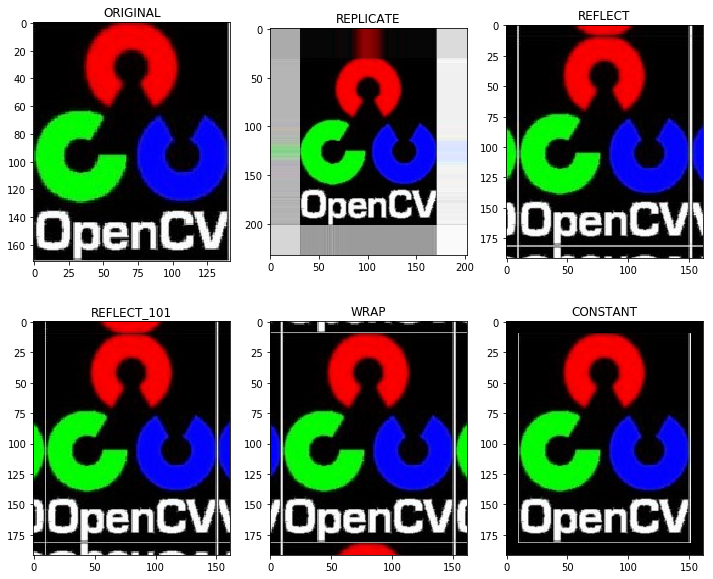

In [112]:
blue = [255, 0 ,0]
img1 = cv.imread('opencv.jpg')

replicate = cv.copyMakeBorder(img1, 30, 30, 30, 30, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT101)
wrap = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_CONSTANT)
plt.figure(figsize= (12,10))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

Note that **RED** and **BLUE** channels are interchanged i matplotlib

### De nada!